# QBUS 6850 Group 13 S1 2019

# Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TASK A-- Neural Network

In [2]:
# import Dataset
margin=pd.read_csv("Margin.csv")
X=margin.iloc[:,:6]
y=margin.iloc[:,6]

In [3]:
# initialization of layers and weights
input_layer_size= 6
hidden_layer_size= 12
output_layer_size= 1
# initialize the weights parameters
np.random.seed(0)
W1= np.random.randn(input_layer_size, hidden_layer_size)
W2= np.random.randn(hidden_layer_size, output_layer_size)

# define learning rate of gradient descent
alpha= 0.0001
print(W1.shape)
print(W2.shape)

(6, 12)
(12, 1)


In [4]:
Xt=X/X.max()
yt=y/y.max()
yt=yt.values
yt=np.matrix(yt.reshape(-1,1))
Xt=np.matrix(Xt.values)
Z1=np.dot(Xt,W1)
Activation1=1/(1+np.exp(-Z1))

Z2=np.dot(Activation1,W2)
Activation2=1/(1+np.exp(-Z2))

loss1=(yt*y.max()-Activation2*y.max()).T *(yt*y.max()-Activation2*y.max())/2
loss2=(yt-Activation2).T *(yt-Activation2)/2
#loss=np.square(y.max())*(yt-Activation2).T *(yt-Activation2)/2

In [5]:
sig_gradient=np.multiply((1-Activation2),Activation2)
gradient2=Activation1.T * np.multiply((Activation2-yt),sig_gradient)
sig1_gradient=np.multiply((1-Activation1),Activation1)
gradient1=Xt.T*np.multiply(np.multiply((Activation2-yt),sig_gradient)*W2.T,sig1_gradient)
loss1_list=np.ones(10001)*loss1[0,0].round(4)
loss2_list=np.ones(10001)*loss2[0,0].round(4)
print("Loss1:" ,loss1)
print("Loss2:" ,loss2)

Loss1: [[60324.55317387]]
Loss2: [[15.29589263]]


In [6]:
gradient_1=pd.DataFrame(gradient1.T,columns=['gradient1','gradient2','gradient3','gradient4','gradient5','gradient6'],
                       index=['input1','input2','input3','input4','input5','input6','input7','input8','input9',
                              'input10','input11','input12']).round(4)
gradient_2=pd.DataFrame(gradient2.T,columns=['gradient1','gradient2','gradient3','gradient4','gradient5','gradient6',
                                         'gradient7','gradient8','gradient9','gradient10','gradient11','gradient12'],
                       index=['input']).round(4)
w_1=(W1-alpha*gradient1).round(4)
w_1=pd.DataFrame(w_1.T,columns=['weight1','weight2','weight3','weight4','weight5','weight6'],
                       index=['input1','input2','input3','input4','input5','input6','input7','input8','input9',
                              'input10','input11','input12'])
w_2=(W2-alpha*gradient2).round(4)
w_2=pd.DataFrame(w_2.T,columns=['weight1','weight2','weight3','weight4','weight5','weight6',
                                         'weight7','weight8','weight9','weight10','weight11','weight12'],
                       index=['input'])

In [7]:
gradient_2.to_csv('F:\qbus6850\GROUP\gradient2.csv')
gradient_1.to_csv('F:\qbus6850\GROUP\gradient1.csv')
gradient_2.to_csv('F:\qbus6850\GROUP\gradient2.csv')
w_2.to_csv('F:\qbus6850\GROUP\w2.csv')
w_1.to_csv('F:\qbus6850\GROUP\w1.csv')

In [8]:
for i in range(10000):
    #print(Activation2[1])
    W1=W1-alpha*gradient1
    W2=W2-alpha*gradient2
    Z1=np.dot(Xt,W1)
    Activation1=1/(1+np.exp(-Z1))
    Z2=np.dot(Activation1,W2)
    Activation2=1/(1+np.exp(-Z2))
    loss1=np.square(y.max())*(yt-Activation2).T *(yt-Activation2)/2
    loss2=(yt-Activation2).T *(yt-Activation2)/2
    loss1_list[i+1]=loss1[0,0].round(4)
    loss2_list[i+1]=loss2[0,0].round(4)
    sig_gradient=np.multiply((1-Activation2),Activation2)
    gradient2=Activation1.T * np.multiply((Activation2-yt),sig_gradient)
    sig1_gradient=np.multiply((1-Activation1),Activation1)
    gradient1=Xt.T*np.multiply(np.multiply((Activation2-yt),sig_gradient)*W2.T,sig1_gradient)
    

In [9]:
Final_W1=pd.DataFrame(W1.T,columns=['weight1','weight2','weight3','weight4','weight5','weight6'],
                       index=['input1','input2','input3','input4','input5','input6','input7','input8','input9',
                              'input10','input11','input12']).round(4)
Final_W2=pd.DataFrame(W2.T,columns=['weight1','weight2','weight3','weight4','weight5','weight6',
                                         'weight7','weight8','weight9','weight10','weight11','weight12'],
                       index=['input']).round(4)
print("Final Loss", loss1_list[-1])
print("1st Loss", loss1_list[1])
print("Final Loss", loss2_list[-1])
print("1st Loss", loss2_list[1])

Final Loss 2793.1038
1st Loss 60199.3001
Final Loss 0.7082
1st Loss 15.2641


In [10]:
Final_W2.to_csv('F:\qbus6850\GROUP\Finalw2.csv')
Final_W1.to_csv('F:\qbus6850\GROUP\Finalw1.csv')

Text(0,0.5,'loss transformed')

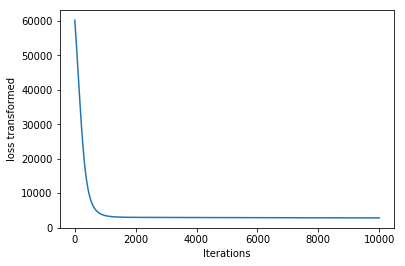

In [11]:
plt.plot(range(10000),loss1_list[1:])
plt.xlabel("Iterations")
plt.ylabel('loss transformed')

Text(0,0.5,'loss in iteration')

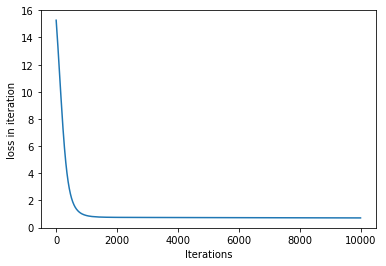

In [12]:
plt.plot(range(10000),loss2_list[1:])
plt.xlabel("Iterations")
plt.ylabel('loss in iteration')

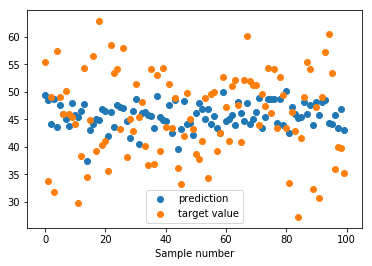

In [13]:
y_pred=Activation2*y.max()
plt.scatter(range(100),y_pred.tolist(),label='prediction')
plt.scatter(range(100),y,label='target value')
plt.xlabel('Sample number')
plt.legend()
plt.savefig('A1.png',bbox_inches='tight', dpi=900)

# TASK B-- Multiplicative updating algorithm for Nonnegative Matrix Factorization

In [14]:
# B1. initializations

numIterations= 100
# input matrix V
V= np.matrix([[5,2,3,1,2],
[3,2,6,1,6],
[3,2,1,5,7],
[1,6,1,6,7],
[8,6,3,2,5],
[6,1,5,1,5]])
[d, N]= np.shape(V)
np.random.seed(0)
r= 2

W_init= np.abs(np.random.randn(d, r))

H_init= np.abs(np.random.randn(r, N))

In [15]:
# B2. Loop for multiplicative updatin algorithm
W= W_init
H= H_init
b_loss_list=[]

for i in range(numIterations):
  
    H= np.multiply(H, (W.T.dot(V))/(W.T.dot(W).dot(H)))

    W= np.multiply(W, (V.dot(H.T))/(W.dot(H).dot(H.T)))
                 
    loss= np.sum(np.square(V-W.dot(H)))
    b_loss_list.append(loss)

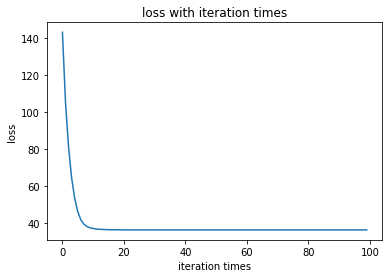

In [16]:
# B3. plot loss
plt.plot(range(100),b_loss_list)
plt.title('loss with iteration times')
plt.xlabel('iteration times')
plt.ylabel('loss')
plt.savefig('b_loss.png',dpi=900)

In [17]:
#B4. save answers to files
np.savetxt('H4.csv',H.round(4), delimiter = ',') 
np.savetxt('w4.csv',W.round(4), delimiter = ',') 
pd.DataFrame(b_loss_list).to_csv('b2_loss.csv')

# TASK C-- House price prediction

## Import Libraries

In [18]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_columns', 200)
import seaborn as sns
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')
sns.set_context('notebook') 
sns.set_style('ticks')
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) 
%matplotlib inline

## Import dataset

In [19]:
houseprice=pd.read_csv('train.csv',keep_default_na=False,na_values=[''])
y=houseprice['SalePrice']

In [20]:
## overview of dataset
houseprice.shape

(1398, 81)

In [21]:
y.describe()

count      1398.000000
mean     180196.785408
std       81695.371731
min       12789.000000
25%      128062.500000
50%      160000.000000
75%      212000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [22]:
year=houseprice[['Year Remod/Add']]
year.describe()

,Year Remod/Add
count,1398.000000
mean,1983.944921
std,21.015534
min,1950.000000
25%,1965.000000
50%,1992.000000
75%,2004.000000
max,2010.000000


In [23]:
## overview of target variable

In [24]:
price=houseprice[['SalePrice']]
price.describe()

,SalePrice
count,1398.000000
mean,180196.785408
std,81695.371731
min,12789.000000
25%,128062.500000
50%,160000.000000
75%,212000.000000
max,745000.000000


<function matplotlib.pyplot.show(*args, **kw)>

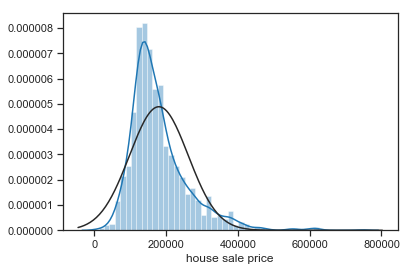

In [25]:
sns.distplot(price,fit=norm)
plt.xlabel('house sale price')
plt.savefig('originy.png',dpi=900)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

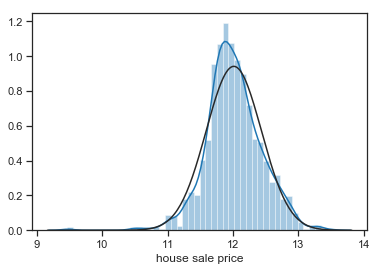

In [26]:
sns.distplot(np.log(price),fit=norm)
plt.xlabel('house sale price')
plt.savefig('logy.png',dpi=900)
plt.show

In [27]:
mean_price= houseprice.groupby('Yr Sold').mean()
price_year_sold= mean_price[['SalePrice']]

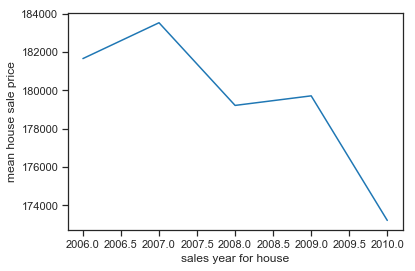

In [28]:
plt.plot(price_year_sold)
plt.xlabel('sales year for house')
plt.ylabel('mean house sale price')
plt.savefig('sale price.png',bbox_inches='tight', dpi=900)

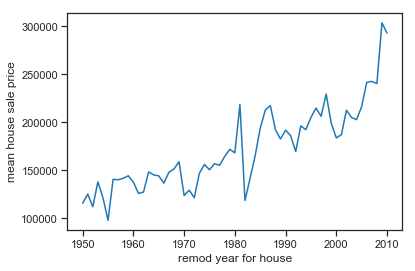

In [29]:
mean_price= houseprice.groupby('Year Remod/Add').mean()
price_year_remod= mean_price[['SalePrice']]
plt.plot(price_year_remod)
plt.xlabel('remod year for house')
plt.ylabel('mean house sale price')
plt.savefig('sale price_remod.png',bbox_inches='tight', dpi=900)

## Null value processing 

In [30]:
df_x= houseprice.drop(columns=['SalePrice'])

In [31]:
nan=houseprice.isnull().sum()
nan=nan.iloc[nan.nonzero()[0]]
nan=pd.DataFrame(nan).T
nan.T.to_csv('null values.csv')

## Garage related features

In [32]:
garage_cols = [col for col in houseprice.columns if 'Garage' in col]
garage_cols=houseprice[garage_cols]
garage_cols=garage_cols[garage_cols.isnull().any(axis=1)]
# NO.1333th sample has value in Garage Type, but null in other Garage related features

## bsmt related features

In [33]:
bsmt_cols = [col for col in houseprice.columns if 'Bsmt' in col]
bsmt_cols=houseprice[bsmt_cols]
bsmt_cols=bsmt_cols[bsmt_cols.isnull().any(axis=1)]
#NO.816: all NAN NA or 0, so no basement
#NO.332,1184 all filled, just exposure none

## Masonary related features

In [34]:
mas_cols = [col for col in houseprice.columns if 'Mas' in col]
mas_cols=houseprice[mas_cols]
mas_cols=mas_cols[mas_cols.isnull().any(axis=1)]
houseprice['Mas Vnr Type'].unique()
# this feature does not include NA as a category
# so for Mas Vnr Type, fill NA as None, the other fill NA as 0

array(['None', 'BrkFace', 'Stone', nan, 'BrkCmn'], dtype=object)

In [35]:
# only one null sample, NA is not included as a category
# Find max value for electricity
max(set(houseprice['Electrical']), key=list(houseprice['Electrical']).count)

'SBrkr'

In [36]:
houseprice['Lot Frontage'].fillna(0,inplace=True)
houseprice['Garage Yr Blt'].fillna(houseprice['Garage Yr Blt'].min()-1,inplace=True)# for convenience purpose
houseprice['Garage Finish'].fillna('NA',inplace=True)
houseprice['Garage Qual'].fillna('NA',inplace=True)
houseprice['Garage Cond'].fillna('NA',inplace=True)
houseprice['Garage Type'][1333]='NA'
houseprice['Garage Cars'].fillna(0,inplace=True)
houseprice['Garage Area'].fillna(0,inplace=True)
houseprice['Bsmt Exposure'][1184]="No"
houseprice['Bsmt Exposure'][332]="No"
houseprice['Bsmt Half Bath'].fillna(0,inplace=True)
houseprice['Bsmt Full Bath'].fillna(0,inplace=True)
houseprice['Mas Vnr Type'].fillna("None", inplace=True)
houseprice['Mas Vnr Area'].fillna(0, inplace=True)
houseprice['Electrical'].fillna('SBrkr',inplace=True)

## Observation of numerical features

In [37]:
feature_numeric=houseprice.select_dtypes(include=[np.number])
feature_numeric=feature_numeric.drop(columns='SalePrice')
num_feature = feature_numeric.columns.tolist()
feature_numeric.head()

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,1,80,76.0,9880,6,6,1977,1977,0.0,522,0,574,1096,1118,0,0,1118,1.0,0.0,1,0,3,1,6,1,1977.0,1.0,358.0,203,0,0,0,0,576,0,7,2008
1,2,20,0.0,21000,6,5,1953,1953,184.0,35,869,905,1809,2259,0,0,2259,1.0,0.0,2,0,3,1,7,2,1953.0,2.0,450.0,166,120,192,0,0,0,0,10,2007
2,3,60,313.0,63887,10,5,2008,2008,796.0,5644,0,466,6110,4692,950,0,5642,2.0,0.0,2,1,3,1,12,3,2008.0,2.0,1418.0,214,292,0,0,0,480,0,1,2008
3,4,20,100.0,11824,8,5,2006,2006,298.0,0,0,1685,1685,1685,0,0,1685,0.0,0.0,2,0,2,1,5,1,2006.0,3.0,658.0,112,63,0,0,0,0,0,4,2007
4,5,20,72.0,10011,5,6,1957,1996,64.0,360,0,710,1070,1236,0,0,1236,0.0,1.0,1,0,2,1,6,1,1957.0,1.0,447.0,0,0,0,0,0,0,0,5,2006


In [38]:
def plot_regressions(X, y):
    labels = list(X.columns)
    N, p = X.shape
    rows = int(np.ceil(p/3))
    fig, axes = plt.subplots(rows, 6, figsize=(16, rows*(16/6)))
    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(X.iloc[:,i], y,  ci=None, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.8}, ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)
    sns.despine()
    plt.tight_layout()   
    return fig, axes

In [39]:
combined=pd.concat([y,feature_numeric],axis=1)

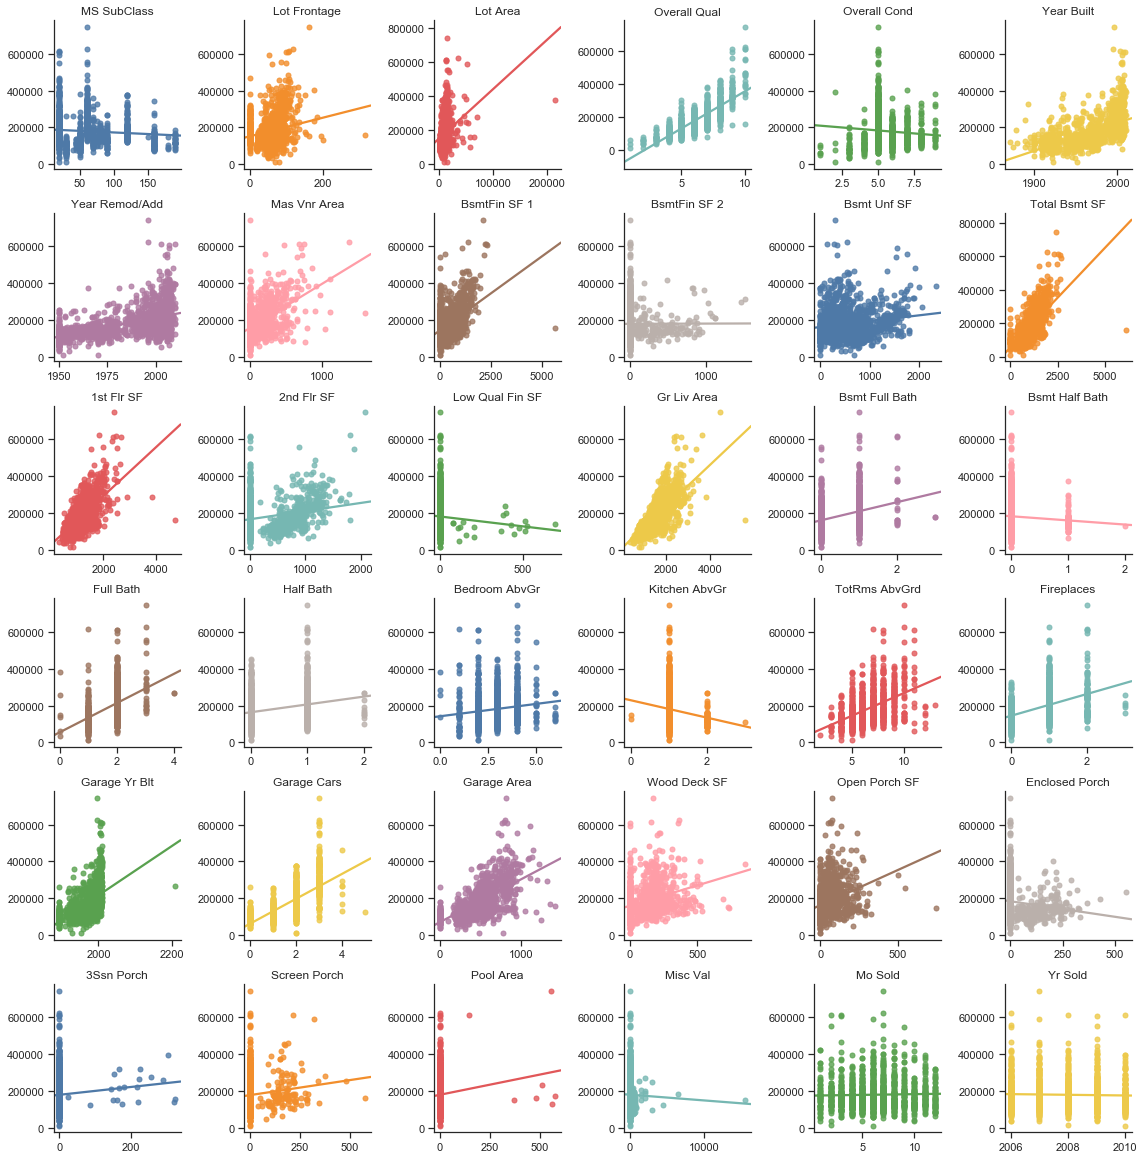

In [40]:
with sns.color_palette(crayon):
    plot_regressions(feature_numeric.iloc[:,1:],combined.iloc[:,0])
    plt.savefig('temp1.png',dpi=900)

In [41]:
#possible outliers
feature_numeric=houseprice.select_dtypes(include=[np.number])
feature_numeric=feature_numeric.loc[:,feature_numeric.columns !='SalePrice']
feature_numeric=feature_numeric.loc[:,feature_numeric.columns !='Train_ID']
outliers=feature_numeric.idxmax(axis = 0, skipna = True)
value=pd.Series(np.arange(36),index =outliers.index)
for i in list(outliers.index):
    value[i]=houseprice[i][outliers[i]]
outliers=pd.concat([outliers, value], axis=1)

In [42]:
# examing different categories for categorical features in test and train data sets
feature_object=houseprice.select_dtypes(exclude=[np.number])
train = {}
for i in range(43):
    a=feature_object.columns[i]
    train.update({a:feature_object.iloc[:,i].unique()})
feature_tobject=pd.read_csv('test.csv',keep_default_na=False,na_values=['']).dropna(axis=0)
feature_tobject=feature_tobject.select_dtypes(exclude=[np.number])
test = {}
sorted(feature_tobject.iloc[:,i].unique(), key=str.lower, reverse=True)
for i in range(43):
    a=feature_tobject.columns[i]
    test.update({a:feature_tobject.iloc[:,i].unique()})
b=0
index=0
diff=pd.DataFrame(columns=['feature','train','test'],index=range(21))
for i in range(43):
    a=feature_tobject.columns[i]
    if sorted(test[a]) == sorted(train[a]):
        b=b+1
    else:
        diff['feature'][index]=a
        m=feature_object[a].unique().tolist()
        n=feature_tobject[a].unique().tolist()
        diff['train'][index]=str([value for value in m if value not in n])
        diff['test'][index]=str([value for value in n if value not in m])
        index=index+1
        print("train: ",[value for value in m if value not in n])
diff.to_csv('diff.csv')

train:  ['RL ', 'I (all)']
train:  ['NoSewr']
train:  ['GrnHill']
train:  ['PosA']
train:  ['ClyTile', 'Roll', 'Membran']
train:  ['AsphShn', 'PreCast', 'Stone']
train:  ['AsphShn', 'PreCast', 'CBlock']
train:  ['Wood']
train:  ['Po']
train:  ['OthW', 'Floor']
train:  ['Po']
train:  []
train:  []
train:  ['Sal', 'Sev']
train:  ['NA']
train:  ['NA']
train:  ['NA']
train:  ['NA', 'Ex']
train:  []
train:  []
train:  []


In [43]:
# deal with outliers
houseprice['Garage Yr Blt'][117]=2007
houseprice=houseprice.drop([2],axis=0)

In [44]:
# deal with years
houseprice['Garage Yr Blt']=houseprice['Garage Yr Blt']-houseprice['Garage Yr Blt'].min()
houseprice['Yr Sold']=houseprice['Yr Sold']-houseprice['Yr Sold'].min()+1
houseprice['Year Built']=houseprice['Year Built']-houseprice['Year Built'].min()+1
houseprice['Year Remod/Add']=houseprice['Year Remod/Add']-houseprice['Year Remod/Add'].min()+1

In [45]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.6/site-packages (0.9.0)
Requirement not upgraded as not directly required: matplotlib>=1.4.3 in /anaconda3/lib/python3.6/site-packages (from seaborn) (2.2.2)
Requirement not upgraded as not directly required: pandas>=0.15.2 in /anaconda3/lib/python3.6/site-packages (from seaborn) (0.23.0)
Requirement not upgraded as not directly required: numpy>=1.9.3 in /anaconda3/lib/python3.6/site-packages (from seaborn) (1.14.3)
Requirement not upgraded as not directly required: scipy>=0.14.0 in /anaconda3/lib/python3.6/site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: cycler>=0.10 in /anaconda3/lib/python3.6/site-packages (from matplotlib>=1.4.3->seaborn) (0.10.0)
Requirement not upgraded as not directly required: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /anaconda3/lib/python3.6/site-packages (from matplotlib>=1.4.3->seaborn) (2.2.0)
Requirement not upgraded as not directly required: python-d

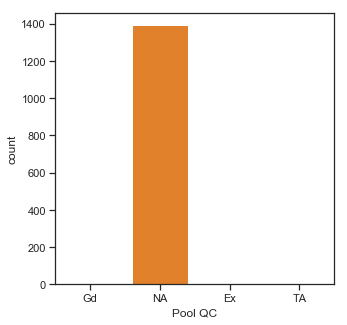

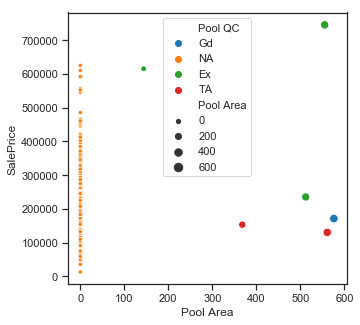

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(houseprice['Pool QC'])
plt.figure(figsize=(5,5))
sns.scatterplot(x='Pool Area', y='SalePrice',data=houseprice,size='Pool Area',
                hue='Pool QC')
plt.savefig('91.png',bbox_inches='tight', dpi=900)

In [47]:
#drop pool related features
pool = [col for col in houseprice.columns if 'Pool' in col]
pool=houseprice[pool]
houseprice=houseprice.drop(pool, axis=1)

In [48]:
#deal with ordinal data
dict={'Ex':5,
     'Gd':4,
     'TA':3,
     'Fa':2,
     'Po':1,
     'NA':0}

houseprice=houseprice.replace({'Exter Qual':dict})
houseprice=houseprice.replace({'Exter Cond':dict})
houseprice=houseprice.replace({'Bsmt Qual':dict})
houseprice=houseprice.replace({'Bsmt Cond':dict})
houseprice=houseprice.replace({'Heating QC':dict})
houseprice=houseprice.replace({'Kitchen Qual':dict})
houseprice=houseprice.replace({'Fireplace Qu':dict})
houseprice=houseprice.replace({'Garage Qual':dict})
houseprice=houseprice.replace({'Garage Cond':dict})

col_to_num=['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Garage Qual','Garage Cond']
houseprice['Exter Qual']=pd.to_numeric(houseprice['Exter Qual'])
houseprice['Exter Cond']=pd.to_numeric(houseprice['Exter Cond'])
houseprice['Bsmt Qual']=pd.to_numeric(houseprice['Bsmt Qual'])
houseprice['Bsmt Cond']=pd.to_numeric(houseprice['Bsmt Cond'])
houseprice['Heating QC']=pd.to_numeric(houseprice['Heating QC'])
houseprice['Kitchen Qual']=pd.to_numeric(houseprice['Kitchen Qual'])
houseprice['Garage Qual']=pd.to_numeric(houseprice['Garage Qual'])
houseprice['Garage Cond']=pd.to_numeric(houseprice['Garage Cond'])

dict={'GLQ':6,
     'ALQ':5,
     'BLQ':4,
     'Rec':3,
     'LwQ':2,
     'Unf':1,
     'NA' :0}

houseprice=houseprice.replace({'BsmtFin Type 1':dict})
houseprice=houseprice.replace({'BsmtFin Type 2':dict})

dict={'GdPrv':4,
     'MnPrv':3,
     'GdWo':2,
     'MnWw':1,
     'NA' :0}

houseprice=houseprice.replace({'Fence':dict})

dict={'Gd':4,
     'Av':3,
     'Mn':2,
     'No':1,
     'NA' :0}

houseprice=houseprice.replace({'Bsmt Exposure':dict})
houseprice['Bsmt Exposure']=pd.to_numeric(houseprice['Bsmt Exposure'], errors='ignore')
houseprice['Fence']=pd.to_numeric(houseprice['Fence'], errors='ignore')
houseprice['BsmtFin Type 1']=pd.to_numeric(houseprice['BsmtFin Type 1'], errors='ignore')
houseprice['BsmtFin Type 2']=pd.to_numeric(houseprice['BsmtFin Type 2'], errors='ignore')
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1397
Data columns (total 79 columns):
Train_ID           1397 non-null int64
MS SubClass        1397 non-null int64
MS Zoning          1397 non-null object
Lot Frontage       1397 non-null float64
Lot Area           1397 non-null int64
Street             1397 non-null object
Alley              1397 non-null object
Lot Shape          1397 non-null object
Land Contour       1397 non-null object
Utilities          1397 non-null object
Lot Config         1397 non-null object
Land Slope         1397 non-null object
Neighborhood       1397 non-null object
Condition 1        1397 non-null object
Condition 2        1397 non-null object
Bldg Type          1397 non-null object
House Style        1397 non-null object
Overall Qual       1397 non-null int64
Overall Cond       1397 non-null int64
Year Built         1397 non-null int64
Year Remod/Add     1397 non-null int64
Roof Style         1397 non-null object
Roof Matl          

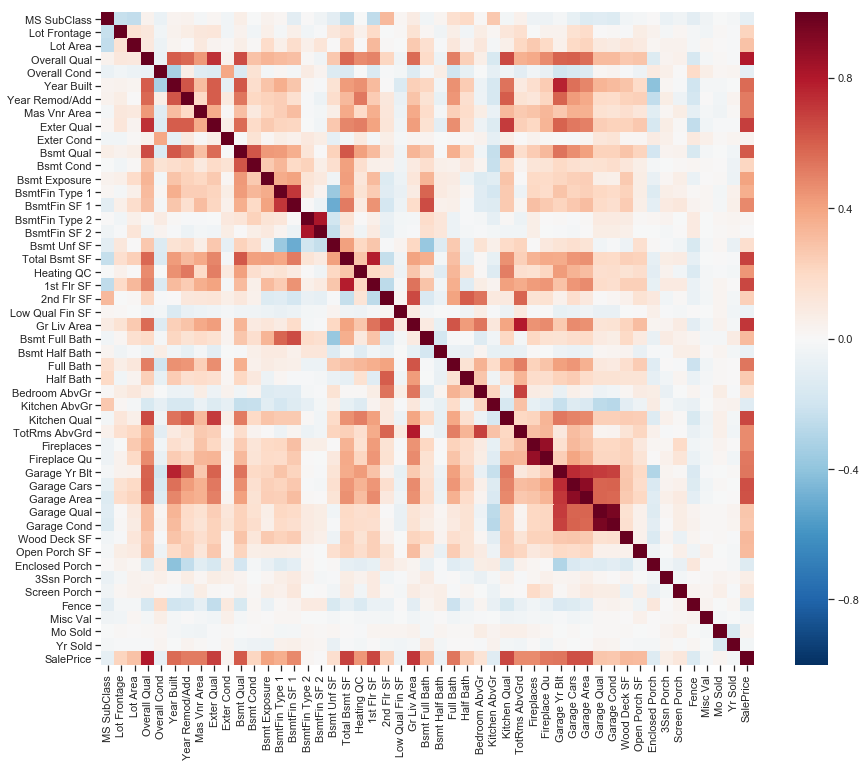

In [49]:
corrmat = houseprice.iloc[:, 1:].corr()  
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, square=True,center=0,vmin=-1,vmax=1,cmap="RdBu_r")
plt.savefig('corr.png',bbox_inches='tight', dpi=900)

In [50]:
houseprice=houseprice.drop('Train_ID', axis=1)

In [51]:
# create dummy variables
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()
houseprice = v.fit_transform(houseprice.to_dict(orient='records'))
index = v.get_feature_names()
train = pd.DataFrame(houseprice.toarray(),columns = index)
cols_drop = ['Central Air=N', 'Street=Grvl','Utilities=NoSewr']
train=train.drop(cols_drop, axis=1)

In [52]:
#split train set into train and validation sets
x=train.loc[:,train.columns !='SalePrice']
y=train.loc[:, 'SalePrice']
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
y_train=y_train.values
y_train=np.reshape(y_train,(-1,1))

In [53]:
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery=StandardScaler()
x_scale=scalerx.fit_transform(x_train)
y_scale=scalery.fit_transform(y_train)

In [54]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x_norm=norm.fit_transform(x_scale)

## deal with test set

In [55]:
test=pd.read_csv('test.csv',keep_default_na=False,na_values=[''])
test['Lot Frontage'].fillna(0,inplace=True)
test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].min()-1,inplace=True)
test['Garage Finish'].fillna('NA',inplace=True)
test['Garage Qual'].fillna('NA',inplace=True)
test['Garage Cond'].fillna('NA',inplace=True)
test['Garage Cars'].fillna(0,inplace=True)
test['Garage Area'].fillna(0,inplace=True)
test['Bsmt Exposure'][258]="No"
test['Bsmt Exposure'].fillna('NA',inplace=True)
test['BsmtFin Type 1'].fillna('NA',inplace=True)
test['BsmtFin Type 2'].fillna('NA',inplace=True)
test['Bsmt Half Bath'].fillna(0,inplace=True)
test['Bsmt Full Bath'].fillna(0,inplace=True)
test['Mas Vnr Type'].fillna("None", inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)
test['Electrical'].fillna('SBrkr',inplace=True)
test['Garage Yr Blt']=test['Garage Yr Blt']-test['Garage Yr Blt'].min()
test['Yr Sold']=test['Yr Sold']-test['Yr Sold'].min()+1
test['Year Built']=test['Year Built']-test['Year Built'].min()+1
test['Year Remod/Add']=test['Year Remod/Add']-test['Year Remod/Add'].min()+1
test['Bsmt Unf SF'].fillna(0,inplace=True)
test['BsmtFin SF 1'].fillna(0,inplace=True)
test['BsmtFin SF 2'].fillna(0,inplace=True)
test['Total Bsmt SF'].fillna(0,inplace=True)
test['Bsmt Cond'].fillna(0,inplace=True)
test['Bsmt Qual'].fillna(0,inplace=True)

dict={'Ex':5,
     'Gd':4,
     'TA':3,
     'Fa':2,
     'Po':1,
     'NA':0}

test=test.replace({'Exter Qual':dict})
test=test.replace({'Exter Cond':dict})
test=test.replace({'Bsmt Qual':dict})
test=test.replace({'Bsmt Cond':dict})
test=test.replace({'Heating QC':dict})
test=test.replace({'Kitchen Qual':dict})
test=test.replace({'Fireplace Qu':dict})
test=test.replace({'Garage Qual':dict})
test=test.replace({'Garage Cond':dict})

col_to_num=['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Garage Qual','Garage Cond']
test['Exter Qual']=pd.to_numeric(test['Exter Qual'])
test['Exter Cond']=pd.to_numeric(test['Exter Cond'])
test['Bsmt Qual']=pd.to_numeric(test['Bsmt Qual'])
test['Bsmt Cond']=pd.to_numeric(test['Bsmt Cond'])
test['Heating QC']=pd.to_numeric(test['Heating QC'])
test['Kitchen Qual']=pd.to_numeric(test['Kitchen Qual'])
test['Garage Qual']=pd.to_numeric(test['Garage Qual'])
test['Garage Cond']=pd.to_numeric(test['Garage Cond'])

dict={'GLQ':6,
     'ALQ':5,
     'BLQ':4,
     'Rec':3,
     'LwQ':2,
     'Unf':1,
     'NA' :0}
test=test.replace({'BsmtFin Type 1':dict})
test=test.replace({'BsmtFin Type 2':dict})

dict={'GdPrv':4,
     'MnPrv':3,
     'GdWo':2,
     'MnWw':1,
     'NA' :0}
test=test.replace({'Fence':dict})

dict={'Gd':4,
     'Av':3,
     'Mn':2,
     'No':1,
     'NA' :0}
test=test.replace({'Bsmt Exposure':dict})

test['Bsmt Exposure']=pd.to_numeric(test['Bsmt Exposure'], errors='ignore')
test['Fence']=pd.to_numeric(test['Fence'], errors='ignore')
test['BsmtFin Type 1']=pd.to_numeric(test['BsmtFin Type 1'], errors='ignore')
test['BsmtFin Type 2']=pd.to_numeric(test['BsmtFin Type 2'], errors='ignore')


test0=test
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()
test0 = v.fit_transform(test0.to_dict(orient='records'))
index = v.get_feature_names()
test0 = pd.DataFrame(test0.toarray(),columns = index)

for column in test0.columns:
    if column not in x.columns:
        test0.drop([column], axis=1,inplace=True)

for column in x.columns:
    if column not in test0.columns:
        test0[column] = 0

test0 = test0.reindex(sorted(test0.columns), axis=1)
        
x_test = test0.loc[:,test0.columns !='Test_ID']
x_test = scalerx.fit_transform(x_test)
x_test = norm.fit_transform(x_test)


## Fit Models with all features

### Random forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
rfr1=RandomForestRegressor(n_estimators=100, max_features=50, max_depth=25,criterion='mse', random_state=0)
rfr1.fit(x_norm, y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_rfr1=rfr1.predict(x_val_norm)
y_rfr1=scalery.inverse_transform(y_rfr1.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_rfr1)).round(4)

33813.3652

In [57]:
y_pred=rfr1.predict(x_norm)
y_pred=scalery.inverse_transform(y_pred)
np.sqrt(mean_squared_error(y_train,y_pred)).round(4)

10409.9172

In [58]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
rfr1.fit(x_all, y_all)

y_predall = rfr1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

10228.0129

In [59]:
result_rfr1 = rfr1.predict(x_test)
result_rfr1 = scalery.inverse_transform(result_rfr1)

result_rfr1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_rfr1})
result_rfr1 = result_rfr1.round(0).astype(int)
result_rfr1.to_csv('rfr1.csv', index=False)

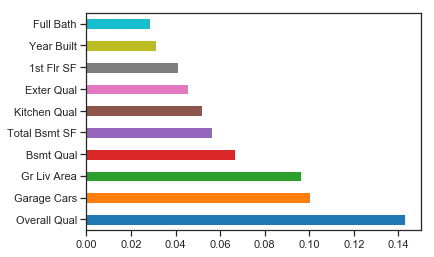

In [60]:
(pd.Series(rfr1.feature_importances_, index=x.columns)
   .nlargest(10)
   .plot(kind='barh')) 

### Ridge Lasso ElasticNet

#### Lasso

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import(LinearRegression,Ridge,Lasso)
lasso1 = Lasso(normalize=True)
tuning_parameters = {'alpha':np.logspace(-5, 2, 10)}
lasso1_search = GridSearchCV(lasso1,tuning_parameters,cv = 5)
lasso1_search.fit(x_norm, y_scale)
print(lasso1_search.best_estimator_)
from sklearn.metrics import mean_squared_error
lasso1=Lasso(alpha=0.000359)
lasso1.fit(x_norm,y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_lasso=lasso1.predict(x_val_norm)
y_lasso=scalery.inverse_transform(y_lasso.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_lasso)).round(4)

Lasso(alpha=0.00035938136638046257, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


34363.2691

In [62]:
y_pred_lasso=lasso1.predict(x_norm)
y_pred_lasso=scalery.inverse_transform(y_pred_lasso)
np.sqrt(mean_squared_error(y_train,y_pred_lasso)).round(4)

26831.23

In [63]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
lasso1.fit(x_all, y_all)
y_predall = lasso1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

27787.6217

In [64]:
result_lasso1 = lasso1.predict(x_test)
result_lasso1 = scalery.inverse_transform(result_lasso1)
result_lasso1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_lasso1})
result_lasso1 = result_lasso1.round(0).astype(int)
result_lasso1.to_csv('lasso1.csv', index=False)

#### Ridge

In [65]:

from sklearn.model_selection import GridSearchCV
alpha_can = np.logspace(-5, 2, 10)
ridge1 = Ridge()
ridge1_search = GridSearchCV(ridge1, param_grid={'alpha': alpha_can}, cv=5)
ridge1_search.fit(x_norm, y_scale)
print(ridge1_search.best_estimator_)


Ridge(alpha=0.4641588833612782, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)


In [66]:
ridge1=Ridge(alpha=0.46416)
ridge1.fit(x_norm,y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_ridge=ridge1.predict(x_val_norm)
y_ridge=scalery.inverse_transform(y_ridge.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_ridge)).round(4)

34546.9589

In [67]:
y_pred_ridge=ridge1.predict(x_norm)
y_pred_ridge=scalery.inverse_transform(y_pred_ridge)
np.sqrt(mean_squared_error(y_train,y_pred_ridge)).round(4)

26311.0501

In [68]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
ridge1.fit(x_all, y_all)

Ridge(alpha=0.46416, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
y_predall = ridge1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

26995.6256

In [70]:
result_ridge1 = ridge1.predict(x_test)
result_ridge1 = scalery.inverse_transform(result_ridge1)
result_ridge1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_ridge1.T[0]})
result_ridge1 = result_ridge1.round(0)
result_ridge1.to_csv('ridge1.csv', index=False)

#### ElasticNet

In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
ela1 = ElasticNet(random_state=0)
tuning_parameters = {'alpha': np.logspace(-5,2,10), 
                     'l1_ratio': np.arange(0,1,0.1)}
ela1_search = GridSearchCV(ela1, tuning_parameters, cv=5)
ela1_search.fit(x_norm, y_scale)
print(ela1_search.best_estimator_)  

ElasticNet(alpha=0.00035938136638046257, copy_X=True, fit_intercept=True,
      l1_ratio=0.6000000000000001, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)


In [72]:
ela1 = ElasticNetCV(l1_ratio=0.6, random_state=0, fit_intercept=True)
ela1.fit(x_norm, y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_ela=ela1.predict(x_val_norm)
y_ela=scalery.inverse_transform(y_ela.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_ela)).round(4)

34417.5963

In [73]:
y_pred_ela=ela1.predict(x_norm)
y_pred_ela=scalery.inverse_transform(y_pred_ela)
np.sqrt(mean_squared_error(y_train,y_pred_ela)).round(4)

26625.9845

In [74]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
ela1.fit(x_all, y_all)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.6, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [75]:
y_predall = ela1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

27515.3763

In [76]:
result_ela1 = ela1.predict(x_test)
result_ela1 = scalery.inverse_transform(result_ela1)
result_ela1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_ela1})
result_ela1 = result_ela1.round(0).astype(int)
result_ela1.to_csv('ela1.csv', index=False)

### SVR

In [77]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel ='rbf')
tuning_parameters = {'C': np.arange(800, 1000, 10)}
svr_cv1 = GridSearchCV(svr, tuning_parameters, cv=5, n_jobs = -1)

svr_cv1.fit(x_norm, y_scale)

print(svr_cv1.best_estimator_)

SVR(C=990, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
CPU times: user 1.2 s, sys: 58.1 ms, total: 1.26 s
Wall time: 20.1 s


In [78]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
svr1 = SVR(kernel ='rbf', C=990)
svr1.fit(x_norm, y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_svr1=svr1.predict(x_val_norm)
y_svr1=scalery.inverse_transform(y_svr1.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_svr1)).round(4)

34753.0021

In [79]:
y_pred=svr1.predict(x_norm)
y_pred=scalery.inverse_transform(y_pred)
np.sqrt(mean_squared_error(y_train,y_pred)).round(4)

25999.6717

In [80]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
svr1.fit(x_all, y_all)
y_predall = svr1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

26096.2837

In [81]:
result_svr1 = svr1.predict(x_test)
result_svr1 = scalery.inverse_transform(result_svr1)

result_svr1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_svr1})
result_svr1 = result_svr1.round(0).astype(int)
result_svr1.to_csv('svr1.csv', index=False)

### XGboost

In [ ]:
%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb = xgb.XGBRegressor(criterion='mse')

tuning_parameters = {'n_estimators': np.arange(50,300,50),
                     'learning_rate': [0.005, 0.01, 0.05, 0.1],
                     'max_depth' : np.arange(2,10,2),
                     'subsample' : [0.6, 0.8, 1.0]}

xgb_search1 = GridSearchCV(xgb, tuning_parameters, cv = 5)
xgb_search1.fit(x_norm, y_scale)

print(xgb_search1.best_estimator_)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb1=xgb.XGBRegressor(n_estimators=250, learning_rate=0.05, max_depth=4, subsample=0.6, criterion='mse', random_state=0)
xgb1.fit(x_norm, y_scale)

x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_xgb1=xgb1.predict(x_val_norm)
y_xgb1=scalery.inverse_transform(y_xgb1.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_xgb1)).round(4)

In [ ]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
xgb1.fit(x_all, y_all)

In [ ]:
y_predall = xgb1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

In [ ]:
(pd.Series(xgb1.feature_importances_, index=x.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [ ]:
result_xgb1 = xgb1.predict(x_test)
result_xgb1 = scalery.inverse_transform(result_xgb1)

result_xgb1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_xgb1})
result_xgb1 = result_xgb1.round(0).astype(int)
result_xgb1.to_csv('xgb1.csv', index=False)

### Model Stacking

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import (LinearRegression,Ridge,Lasso)
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import ElasticNetCV

rfr1=RandomForestRegressor(n_estimators=100, max_features=60, max_depth=25,criterion='mse', random_state=0)
xgb1=xgb.XGBRegressor(n_estimators=250, learning_rate=0.05, max_depth=4, subsample=0.6, criterion='mse', random_state=0)
svr1 = SVR(kernel ='rbf', C=990)
lasso1=Lasso(alpha=0.000359)
ridge1=Ridge(alpha=0.46416)
#ela1 = ElasticNetCV(l1_ratio=0.6, random_state=0, fit_intercept=True)
models=[lasso1,svr1,rfr1, xgb1]
stack1 = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=5)

stack1.fit(x_norm, y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_stack1=stack1.predict(x_val_norm)
y_stack1=scalery.inverse_transform(y_stack1.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_stack1)).round(4)

In [ ]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
stack1.fit(x_all, y_all)
y_predall = stack1.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

In [ ]:
result_stack1 = stack1.predict(x_test)
result_stack1 = scalery.inverse_transform(result_stack1)

result_stack1 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_stack1})
result_stack1 = result_stack1.round(0).astype(int)
result_stack1.to_csv('result_stack3.csv', index=False)

## Fit Models with selected features

### Catergorical Feature Selection

In [ ]:
train_onlycat=train
drop_col=num_feature
train_onlycat=train_onlycat.drop(drop_col, axis=1)
train_onlycat.describe()

In [ ]:
x=train_onlycat.loc[:,train_onlycat.columns !='SalePrice']
y=train.loc[:, 'SalePrice']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
y_train=y_train.values
y_train=np.reshape(y_train,(-1,1))

from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery=StandardScaler()
x_scale=scalerx.fit_transform(x_train)
y_scale=scalery.fit_transform(y_train)

from sklearn.preprocessing import Normalizer
norm=Normalizer()
x_norm=norm.fit_transform(x_scale)

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rfreg = RandomForestRegressor(criterion='mse', random_state=0,n_jobs=-1)
tuning_parameters = {'n_estimators': np.arange(100,300,50), 
                     'max_depth': np.arange(5,30,5),
                     'max_features': np.arange(10, 80, 5)}
rfreg_search2 = RandomizedSearchCV(rfreg,tuning_parameters,cv = 5,n_iter=280,n_jobs=-1,random_state = 0,return_train_score=False)
rfreg_search2.fit(x_norm, y_scale)
print(rfreg_search2.best_estimator_)

### Drop Features(drop 30 categorical and 7 numerical)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
rfr2=RandomForestRegressor(n_estimators=100, max_features=70, max_depth=20,criterion='mse', random_state=0)
rfr2.fit(x, y)
categ_importance = pd.DataFrame(rfr2.feature_importances_, index=x.columns, columns=['importance']).sort_values('importance', ascending=True)
categ_drop = categ_importance.T.iloc[:, :30]
categ_drop = categ_drop.columns.tolist()
drop = train.drop(categ_drop, axis=1)

In [ ]:
num_drop=['Garage Area', 'Total Bsmt SF', 'TotRms AbvGrd', 'Garage Yr Blt', 'Fireplaces','BsmtFin Type 1', 'BsmtFin Type 2']
drop=drop.drop(num_drop, axis=1)
pool = [col for col in drop.columns if 'Pool' in col]
pool=drop[pool]
drop=drop.drop(pool, axis=1)
drop.describe()

## Split the New trainset into Train and Validation set

In [ ]:
x=drop.loc[:,drop.columns !='SalePrice']
y=drop.loc[:, 'SalePrice']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
y_train=y_train.values
y_train=np.reshape(y_train,(-1,1))

from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery=StandardScaler()
x_scale=scalerx.fit_transform(x_train)
y_scale=scalery.fit_transform(y_train)

from sklearn.preprocessing import Normalizer
norm=Normalizer()
x_norm=norm.fit_transform(x_scale)

## Construct New train set

In [ ]:
test=pd.read_csv('test.csv',keep_default_na=False,na_values=[''])

test['Lot Frontage'].fillna(0,inplace=True)
test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].min()-1,inplace=True)
test['Garage Finish'].fillna('NA',inplace=True)
test['Garage Qual'].fillna('NA',inplace=True)
test['Garage Cond'].fillna('NA',inplace=True)
test['Garage Cars'].fillna(0,inplace=True)
test['Garage Area'].fillna(0,inplace=True)
test['Bsmt Exposure'][258]="No"
test['Bsmt Exposure'].fillna('NA',inplace=True)
test['BsmtFin Type 1'].fillna('NA',inplace=True)
test['BsmtFin Type 2'].fillna('NA',inplace=True)
test['Bsmt Half Bath'].fillna(0,inplace=True)
test['Bsmt Full Bath'].fillna(0,inplace=True)
test['Mas Vnr Type'].fillna("None", inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)
test['Electrical'].fillna('SBrkr',inplace=True)

test['Garage Yr Blt']=test['Garage Yr Blt']-test['Garage Yr Blt'].min()
test['Yr Sold']=test['Yr Sold']-test['Yr Sold'].min()+1
test['Year Built']=test['Year Built']-test['Year Built'].min()+1
test['Year Remod/Add']=test['Year Remod/Add']-test['Year Remod/Add'].min()+1

test['Bsmt Unf SF'].fillna(0,inplace=True)
test['BsmtFin SF 1'].fillna(0,inplace=True)
test['BsmtFin SF 2'].fillna(0,inplace=True)
test['Total Bsmt SF'].fillna(0,inplace=True)
test['Bsmt Cond'].fillna(0,inplace=True)
test['Bsmt Qual'].fillna(0,inplace=True)

dict={'Ex':5,
     'Gd':4,
     'TA':3,
     'Fa':2,
     'Po':1,
     'NA':0}

test=test.replace({'Exter Qual':dict})
test=test.replace({'Exter Cond':dict})
test=test.replace({'Bsmt Qual':dict})
test=test.replace({'Bsmt Cond':dict})
test=test.replace({'Heating QC':dict})
test=test.replace({'Kitchen Qual':dict})
test=test.replace({'Fireplace Qu':dict})
test=test.replace({'Garage Qual':dict})
test=test.replace({'Garage Cond':dict})

col_to_num=['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Garage Qual','Garage Cond']
test['Exter Qual']=pd.to_numeric(test['Exter Qual'])
test['Exter Cond']=pd.to_numeric(test['Exter Cond'])
test['Bsmt Qual']=pd.to_numeric(test['Bsmt Qual'])
test['Bsmt Cond']=pd.to_numeric(test['Bsmt Cond'])
test['Heating QC']=pd.to_numeric(test['Heating QC'])
test['Kitchen Qual']=pd.to_numeric(test['Kitchen Qual'])
test['Garage Qual']=pd.to_numeric(test['Garage Qual'])
test['Garage Cond']=pd.to_numeric(test['Garage Cond'])

dict={'GLQ':6,
     'ALQ':5,
     'BLQ':4,
     'Rec':3,
     'LwQ':2,
     'Unf':1,
     'NA' :0}
test=test.replace({'BsmtFin Type 1':dict})
test=test.replace({'BsmtFin Type 2':dict})

dict={'GdPrv':4,
     'MnPrv':3,
     'GdWo':2,
     'MnWw':1,
     'NA' :0}
test=test.replace({'Fence':dict})

dict={'Gd':4,
     'Av':3,
     'Mn':2,
     'No':1,
     'NA' :0}
test=test.replace({'Bsmt Exposure':dict})

test['Bsmt Exposure']=pd.to_numeric(test['Bsmt Exposure'], errors='ignore')
test['Fence']=pd.to_numeric(test['Fence'], errors='ignore')
test['BsmtFin Type 1']=pd.to_numeric(test['BsmtFin Type 1'], errors='ignore')
test['BsmtFin Type 2']=pd.to_numeric(test['BsmtFin Type 2'], errors='ignore')

test0=test
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()
test0 = v.fit_transform(test0.to_dict(orient='records'))
index = v.get_feature_names()
test0 = pd.DataFrame(test0.toarray(),columns = index)
#cols_drop = ['Central Air=N', 'Street=Grvl']
#test0=test0.drop(cols_drop, axis=1)
#test = test.drop(categ_drop, axis=1)
#test0=test0.drop(num_drop, axis=1)
#test0=test0.drop(pool, axis=1)

for column in test0.columns:
    if column not in x.columns:
        test0.drop([column], axis=1,inplace=True)

for column in x.columns:
    if column not in test0.columns:
        test0[column] = 0

test0 = test0.reindex(sorted(test0.columns), axis=1)
        
x_test = test0.loc[:,test0.columns !='Test_ID']
x_test = scalerx.fit_transform(x_test)
x_test = norm.fit_transform(x_test)

### XGboost

In [ ]:
%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb = xgb.XGBRegressor(criterion='mse')

tuning_parameters = {'n_estimators': np.arange(50,300,50),
                     'learning_rate': [0.01, 0.05, 0.1],
                     'max_depth' : np.arange(2,8,2),
                    'subsample': [0.6]}

xgb_search2 = GridSearchCV(xgb, tuning_parameters, cv = 5)
xgb_search2.fit(x_norm, y_scale)

print(xgb_search2.best_estimator_)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
xgb2=xgb.XGBRegressor(n_estimators=250, learning_rate=0.05, max_depth=4, subsample=0.6, criterion='mse', random_state=0)
xgb2.fit(x_norm, y_scale)

x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)

y_xgb2=xgb2.predict(x_val_norm)
y_xgb2=scalery.inverse_transform(y_xgb2.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_xgb2)).round(4)

In [ ]:
y_pred=xgb2.predict(x_norm)
y_pred=scalery.inverse_transform(y_pred)
np.sqrt(mean_squared_error(y_train,y_pred)).round(4)

In [ ]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
xgb2.fit(x_all, y_all)
y_predall = xgb2.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

In [ ]:
result_xgb2 = xgb2.predict(x_test)
result_xgb2 = scalery.inverse_transform(result_xgb2)

result_xgb2 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_xgb2})
result_xgb2 = result_xgb2.round(0).astype(int)
result_xgb2.to_csv('xgb2.csv', index=False)

### Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rfreg = RandomForestRegressor(criterion='mse', random_state=0,n_jobs=-1)
tuning_parameters = {'n_estimators': np.arange(100,400,50), 
                     'max_depth': np.arange(6,26,5),
                     'max_features': np.arange(10, 50, 5)}
rfreg_search3 = RandomizedSearchCV(rfreg,tuning_parameters,cv = 5,n_iter=240,n_jobs=-1,random_state = 0, return_train_score=False)
rfreg_search3.fit(x_norm, y_scale)
print(rfreg_search3.best_estimator_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
rfr3=RandomForestRegressor(n_estimators=350, max_features=45, max_depth=16,criterion='mse', random_state=0)
rfr3.fit(x_norm, y_scale)
x_val=scalerx.fit_transform(x_val)
x_val_norm=norm.fit_transform(x_val)
y_rfr3=rfr3.predict(x_val_norm)
y_rfr3=scalery.inverse_transform(y_rfr3.reshape((-1,1)))
np.sqrt(mean_squared_error(y_val,y_rfr3)).round(4)

In [ ]:
y_pred=rfr3.predict(x_norm)
y_pred=scalery.inverse_transform(y_pred)
np.sqrt(mean_squared_error(y_train,y_pred)).round(4)

In [ ]:
x_all=scalerx.fit_transform(x)
x_all=norm.fit_transform(x_all)
y_all=y.values
y_all=np.reshape(y_all,(-1,1))
y_all=scalery.fit_transform(y_all)
rfr3.fit(x_all, y_all)

In [ ]:
y_predall = rfr3.predict(x_all)
y_predall=scalery.inverse_transform(y_predall)
np.sqrt(mean_squared_error(y,y_predall)).round(4)

In [ ]:
result_rfr3 = rfr3.predict(x_test)
result_rfr3 = scalery.inverse_transform(result_rfr3)

result_rfr3 = pd.DataFrame({'Test_ID':test['Test_ID'], 'SalePrice': result_rfr3})
result_rfr3 = result_rfr3.round(0).astype(int)
result_rfr3.to_csv('rfr3.csv', index=False)